<a href="https://colab.research.google.com/github/luegl/keras_bruno_vs_flaekli_model/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


mount drive

In [ ]:
import os
import numpy as np
from tensorflow import keras
from keras import layers, callbacks
import tensorflow as tf
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

import

In [ ]:
img_size = (180, 180)
img_size_ = 180
BATCH_SIZE = 16


datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest"
)

preprocess data

In [ ]:
train_generator = datagen.flow_from_directory(
    "drive/MyDrive/datasets/dataset_bru_fla",
    target_size=img_size,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

Found 554 images belonging to 2 classes.


train data

In [ ]:
val_generator = datagen.flow_from_directory(
    "drive/MyDrive/datasets/dataset_bru_fla",
    target_size= img_size,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

Found 138 images belonging to 2 classes.


test data

Klassennamen: {'bruno': 0, 'flaekli': 1}


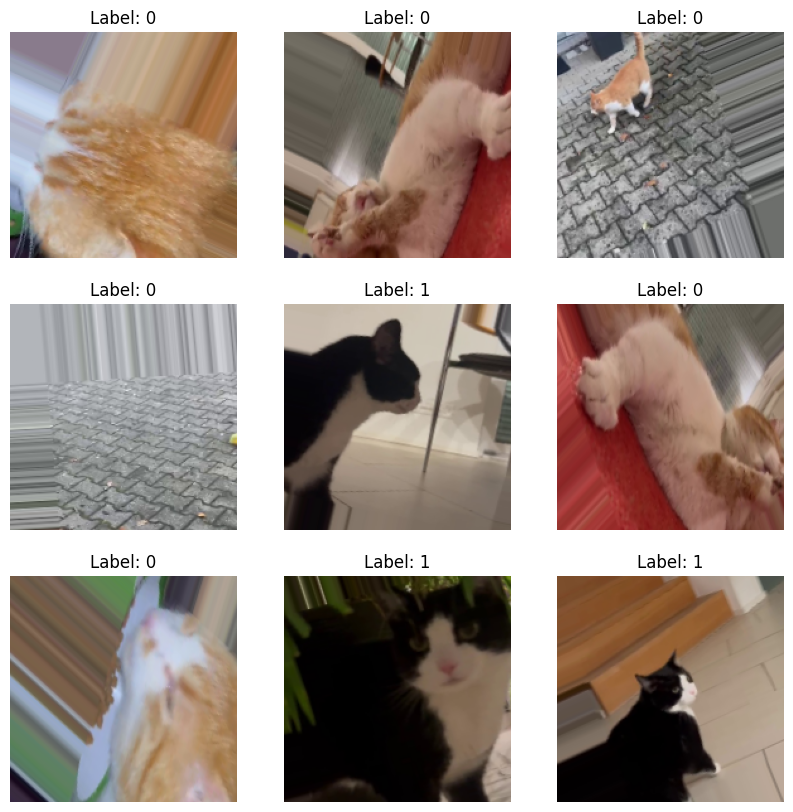

In [ ]:
print("Class names:", train_generator.class_indices)

images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(min(9, BATCH_SIZE)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis("off")
plt.show()

plot example images

In [ ]:
base_model = keras.applications.MobileNetV2(input_shape=(img_size_, img_size_, 3), include_top=False, weights="imagenet")
base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=base_model.input, outputs=x)


model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#checkpoint = callbacks.ModelCheckpoint("cat_model.keras", save_best_only=False, monitor="val_loss")

<ipython-input-12-1714a42178d1>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(input_shape=(img_size_, img_size_, 3), include_top=False, weights="imagenet")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


build model

In [ ]:
model.fit(train_generator, validation_data=val_generator, epochs=5)

model.save("cat_model.keras", save_format="keras")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.8934 - loss: 0.2079 - val_accuracy: 0.9855 - val_loss: 0.0380
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 467ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 1.0000 - val_loss: 0.0095
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 557ms/step - accuracy: 0.9927 - loss: 0.0133 - val_accuracy: 0.9710 - val_loss: 0.0897
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 531ms/step - accuracy: 0.9877 - loss: 0.0488 - val_accuracy: 0.9855 - val_loss: 0.0415
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 454ms/step - accuracy: 0.9999 - loss: 0.0077 - val_accuracy: 0.9928 - val_loss: 0.0169


fit and save model

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - accuracy: 0.9580 - loss: 0.0603
Test Loss: 0.040574390441179276
Test Accuracy: 0.9710144996643066


test model

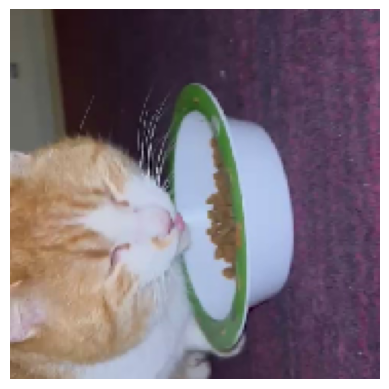

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step
[[1.0743963e-06]]
This image is 100.00% Bruno and 0.00% Fläkli.


<ipython-input-16-0ba746cccc6d>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(predictions[0])  # Da `class_mode="binary"` ist, gibt das Modell eine einzelne Zahl aus


In [ ]:
model = keras.models.load_model('cat_model.keras')

img = keras.utils.load_img("drive/MyDrive/datasets/dataset_bru_fla/bruno/bruno_216.jpg", target_size=img_size)
plt.imshow(img)
plt.axis("off")
plt.show()

img_array = keras.utils.img_to_array(img)


img_array = img_array / 255.0


img_array = tf.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
print(predictions)

score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% Bruno and {100 * score:.2f}% Fläkli.")

use model